# Welcom to this simple introduction to Tensorflow

## 1. Install tensorflow
It is simple to run:

**```sudo pip install tensorflow```**

If you have a GPU card, you can install gpu version. But you should install cuda and cudnn library firstly.

**```sudo pip install tensorflow-gpu```**

GPU version is recommended.

## 2. Basic Concept

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
%matplotlib notebook

In [3]:
g = tf.Graph()

with g.as_default():
    a = tf.placeholder(tf.float32, name="a")
    b = tf.placeholder(tf.float32, name="b")
    c = tf.add(a, b)
    d = tf.placeholder(tf.float32, name="d")
    x = tf.multiply(c, d, name="x")

# Write graph definition to logdir, then tensorboard can read it and draw itin browser.
tf.summary.FileWriter("../logs/basic_add", g).close()

### Display graph
Change workding directory to project root, and execute:  
**```tensorboard --logdir=../logs/basic_add```**

Then open a URL **```http://127.0.0.1:6006```** in your browser, you will get graph picture like this:
![](../logs/images/graph_1.png)


### Run graph

We will get:

**```x = (10+20)*5 = 150```**

In [4]:
# intialize session with the graph we just defined.
with tf.Session(graph=g) as sess:
    # run to get x's value
    x_value = sess.run(x, feed_dict={a:10, b:20, d:5})
    print("Result of x: %f" % x_value)

Result of x: 150.000000


## 3. Toy model to train - Least Squares for linear model

A linear model like:
$$ y = \sum_i x_i w_i + b $$
where $w_i$ is weight for feature $x_i$, and $b$ is bias.

If we take two features ($x_1, x_2$) as example, let $ w_0 = b$, we get,

$$\begin{pmatrix}
y_1 \\
y_2 \\
 \vdots \\
y_N
\end{pmatrix}
=
\begin{pmatrix} 1 & x_{1,1} & x_{2,1} \\
    1 & x_{1,2} & x_{2,2}    \\
    \vdots & \vdots & \vdots \\
    1 & x_{1,N} & x_{2,N}
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1 \\
w_2 
\end{pmatrix},$$

where $N$ is total number of samples.

It can be  written in more compact vector format,
$$  Y = X \cdot W $$

Given sample data $(X, Y)$, the most fit $W$ will make the variance least,

$$ \underset{W}{\arg\min} \frac{1}{N} \sum_{i=1}^{N} |y_i - X_iW|^2 $$

There is a analytic solution for least squares,

$$ W = (X^T X)^{-1}X^T Y$$



In [5]:
import numpy as np
import sklearn.linear_model

In [7]:
# set random seed
np.random.seed(12345)

In [42]:
K = 100000      # number of points
D = 2          # number of features
X = np.random.rand(K, 2) * 100.0
W = np.array([1.5, 2.0])
b = 10
noise = np.random.randn(K) * 30   # observe noise

y = np.dot(X, W) + b     
y = y + noise                    # add noise

### Fit it using algorithm provided by scikit-learn packages. It is a analytic method.

In [53]:
reg = sklearn.linear_model.LinearRegression()
reg.fit(X, y)

# coef_ is w, intercept_ is bias 
reg.coef_, reg.intercept_

(array([ 1.49366215,  1.99559634]), 10.643535358575207)

<IPython.core.display.Javascript object>


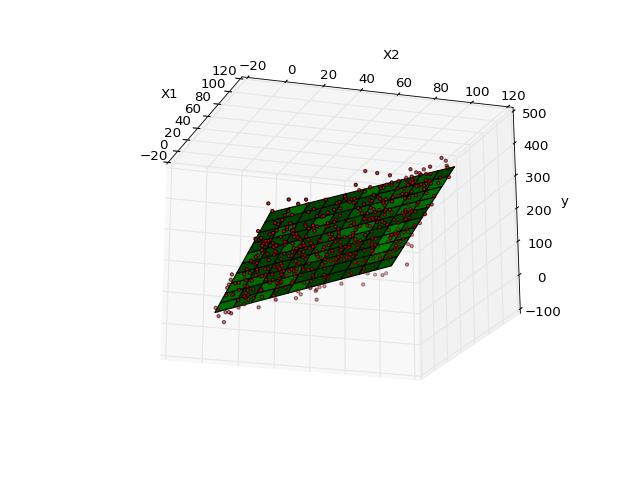

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# draw the points of samples
idx = np.arange(X.shape[0], step=200)
ax.scatter(X[idx,0], X[idx,1], y[idx], c='r', s=8, marker='o')

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

plt.show()

#### Now, add a fit plane

In [52]:
# draw the fit surface 
xs_1 = np.arange(0, 100, 1.0)
xs_2 = np.arange(0, 100, 1.0)
xs_1, xs_2 = np.meshgrid(xs_1, xs_2, indexing="ij")
ys = reg.coef_[0] * xs_1 + reg.coef_[1] * xs_2 + reg.intercept_

surf = ax.plot_surface(xs_1, xs_2, ys, color='green')

plt.show()

In [ ]:
#3